p.204

[mpg데이터와 midwest 데이터를 이용해 분석 문제를 해결]

In [1]:
# 그래프를 만들 때 사용할 mpg 데이터 불러오기
import pandas as pd
mpg = pd.read_csv('D:/WE_IT/doit/bookdata/mpg.csv')
# 그래프를 만들 때 사용할 midwest 데이터 불러오기
midwest = pd.read_csv('D:/WE_IT/doit/bookdata/midwest.csv')

Q1. mpg 데이터의 cty(도시 연비)와 hwy(고속도로 연비) 간에 어떤 관계가 있는지 알아보려고 합니다. x축은 cty, y축은 hwy로 된 산점도를 만들어 보세요.

<Axes: xlabel='cty', ylabel='hwy'>

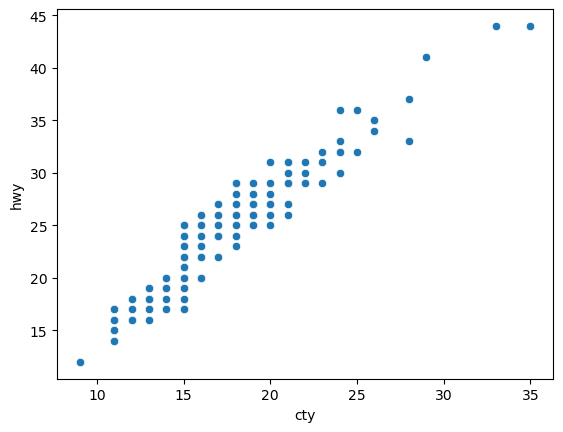

In [2]:
import seaborn as sns
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')   # 산점도 만들기

Q2. midwest.csv를 이용해 전체 인구와 아시아인 인구 간에 어떤 관계가 있는지 알아보려고 합니다. x축은 poptotal(전체 인구), y축은 popasian(아시아인 인구)으로 된 산점도를 만들어 보세요. 전체 인구는 50만 명 이하, 아시아인 인구는 1만 명 이하인 지역만 산점도에 표시되게 설정하세요.

[(0.0, 500000.0), (0.0, 10000.0)]

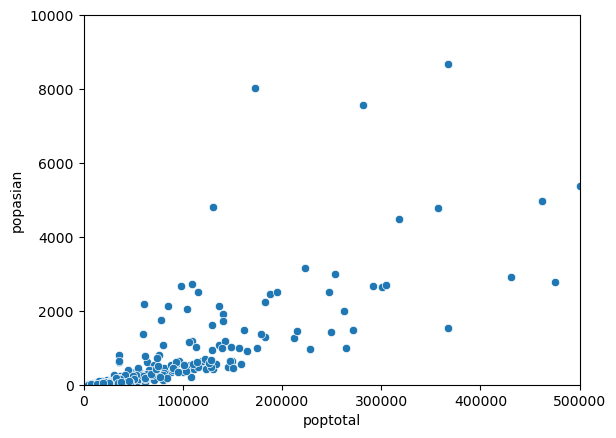

In [3]:
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian') \
   .set(xlim = [0, 500000], ylim = [0, 10000])

p.211

[mpg데이터를 이용해 분석 문제를 해결]

Q1. 어떤 회사에서 생산한 'suv' 차종의 도시 연비가 높은지 알아보려고 합니다. 'suv' 차종을 대상으로 cty(도시 연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보세요. 막대는 연비가 높은 순으로 정렬하세요.

  manufacturer   mean_cty
8       subaru  18.833333
9       toyota  14.375000
7       nissan  13.750000
3         jeep  13.500000
6      mercury  13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

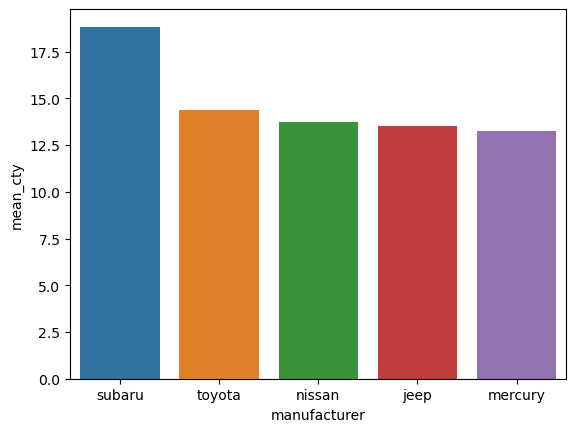

In [6]:
# 집단별 평균표 만들기
df = mpg.query('category == "suv"') \
        .groupby('manufacturer', as_index = False) \
        .agg(mean_cty = ('cty', 'mean')) \
        .sort_values('mean_cty', ascending = False) \
        .head()
print(df)

# 막대 그래프 만들기
sns.barplot(data = df, x = 'manufacturer', y = 'mean_cty')

Q2. 자동차 중에 어떤 category(자동차 종류)가 많은지 알아보려고 합니다. sns.barplot()을 이용해 자동차 종류별 빈도를 표현한 막대 그래프를 만들어 보세요. 막대는 빈도가 높은 순으로 정렬하세요.

     category   n
6         suv  62
1     compact  47
2     midsize  41
5  subcompact  35
4      pickup  33
3     minivan  11
0     2seater   5


<Axes: xlabel='category', ylabel='n'>

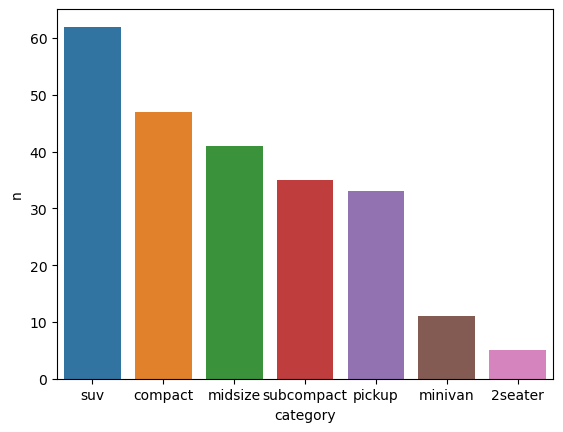

In [7]:
# 집단별 빈도표 만들기
df_mpg = mpg.groupby('category', as_index = False) \
            .agg(n = ('category', 'count')) \
            .sort_values('n', ascending = False)
print(df_mpg)

# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'category', y = 'n')

p.217

[economics 데이터를 이용해 분석 문제를 해결]

In [8]:
economics = pd.read_csv('D:/WE_IT/doit/bookdata/economics.csv')

Q1. psavert(개인 저축률)가 시간에 따라 어떻게 변해 왔는지 알아보려고 합니다. 연도별 개인 저축률의 변화를 나타낸 시계열 그래프를 만들어 보세요.

C:\Users\s2102\AppData\Local\Temp\ipykernel_7780\841857943.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics, x = 'year', y = 'psavert', ci = None)
c:\Users\s2102\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s2102\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='psavert'>

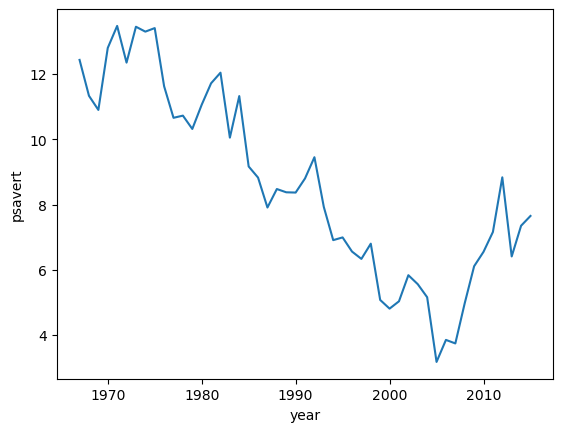

In [9]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 연도 변수 만들기
economics['year'] = economics['date2'].dt.year

# 연도별 개인 저축률 선 그래프
sns.lineplot(data = economics, x = 'year', y = 'psavert', ci = None)

Q2. 2014년 월별 psavert의 변화를 나타낸 시계열 그래프를 만들어 보세요.

C:\Users\s2102\AppData\Local\Temp\ipykernel_7780\4000171867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_2014, x = 'month', y = 'psavert', ci = None)
c:\Users\s2102\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s2102\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='psavert'>

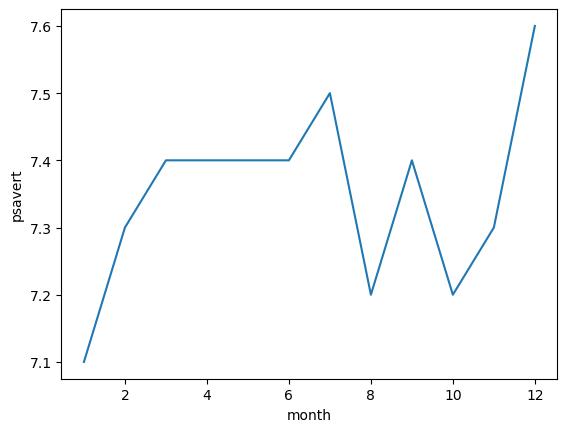

In [10]:
# 월 변수 추가
economics['month'] = economics['date2'].dt.month

# 2014년 추출
df_2014 = economics.query('year == 2014')

# 선 그래프 만들기
sns.lineplot(data = df_2014, x = 'month', y = 'psavert', ci = None)

p.220

Q1. category(자동차 종류)가 'compact', 'subcompact', 'suv'인 자동차의 cty(도시 연비)가 어떻게 다른지 비교해 보려고 합니다. 세 차종의 cty를 나타낸 상자 그림을 만들어 보세요.

<Axes: xlabel='category', ylabel='cty'>

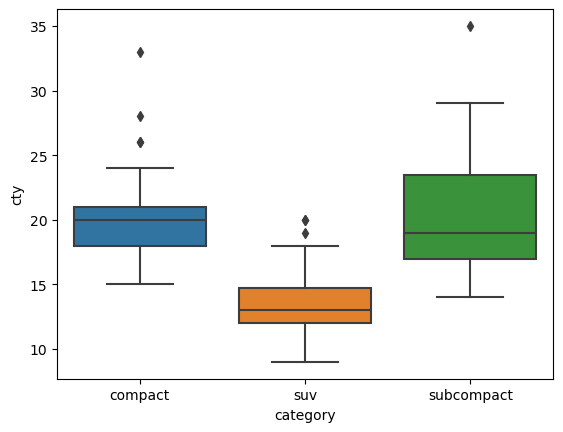

In [17]:
# 'compact' ,'subcompact', 'suv' 차종 추출
df = mpg.query('category in ["compact", "subcompact", "suv"]')

# 상자 그림 만들기
sns.boxplot(data = df, x = 'category', y = 'cty')